이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/main/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

# 머신 러닝의 기본 요소

## 일반화: 머신 러닝의 목표

### 과소적합과 과대적합

#### 잡음 섞인 훈련 데이터

#### 불확실한 특성

#### 드문 특성과 가짜 상관관계

**MNIST에 백색 잡음 픽셀과 0 픽셀을 추가하기**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
train_images.shape

(60000, 784)

In [2]:
train_images_with_noise_channels.shape

(60000, 1568)

In [4]:
np.zeros((len(train_images), 784))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기**

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 4ms/step - loss: 0.5983 - accuracy: 0.8189 - val_loss: 0.2916 - val_accuracy: 0.9141
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2525 - accuracy: 0.9215 - val_loss: 0.1861 - val_accuracy: 0.9473
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1672 - accuracy: 0.9489 - val_loss: 0.2568 - val_accuracy: 0.9237
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1181 - accuracy: 0.9630 - val_loss: 0.1538 - val_accuracy: 0.9529
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0874 - accuracy: 0.9729 - val_loss: 0.1154 - val_accuracy: 0.9672
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0667 - accuracy: 0.9788 - val_loss: 0.1158 - val_accuracy: 0.9665
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0475 - accuracy: 0.9850 - val_loss: 0.1090 - val_accuracy: 0.9677
Epoch 

**검증 정확도 비교 그래프 그리기**

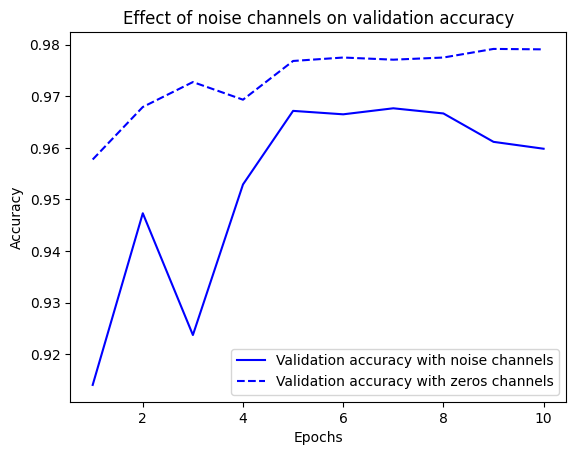

In [6]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

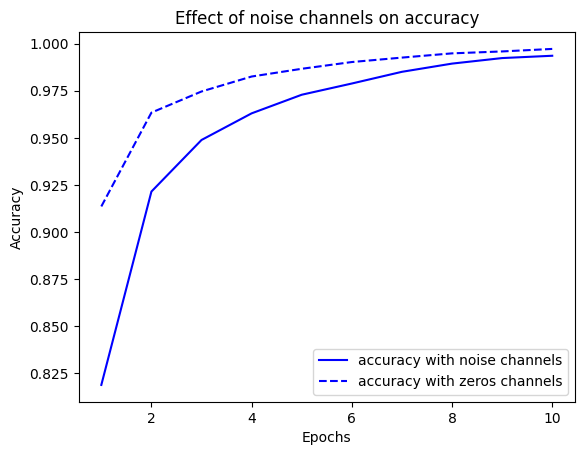

In [8]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["accuracy"]
val_acc_zeros = history_zeros.history["accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="accuracy with zeros channels")
plt.title("Effect of noise channels on accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 딥러닝에서 일반화의 본질

**랜덤하게 섞은 레이블로 MNIST 모델 훈련하기**

In [12]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:].copy
np.random.shuffle(random_train_labels)

TypeError: ignored

In [14]:
train_label[:10]

NameError: ignored

In [9]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 2.3152 - accuracy: 0.1064 - val_loss: 2.3056 - val_accuracy: 0.1063
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2988 - accuracy: 0.1175 - val_loss: 2.3085 - val_accuracy: 0.1037
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2910 - accuracy: 0.1251 - val_loss: 2.3183 - val_accuracy: 0.1090
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2786 - accuracy: 0.1411 - val_loss: 2.3221 - val_accuracy: 0.0994
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2619 - accuracy: 0.1520 - val_loss: 2.3380 - val_accuracy: 0.1035
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2421 - accuracy: 0.1671 - val_loss: 2.3528 - val_accuracy: 0.0986
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2198 - accuracy: 0.1786 - val_loss: 2.3640 - val_accuracy: 0.0984

#### 매니폴드 가설

#### 일반화의 원천인 보간

#### 딥러닝이 작동하는 이유

#### 가장 중요한 훈련 데이터

## 머신 러닝 모델 평가

### 훈련, 검증, 테스트 세트

#### 단순 홀드아웃 검증

#### K-겹 교차 검증

#### 셔플링을 사용한 반복 K-겹 교차 검증

### 상식 수준의 기준점을 넘기

### 모델 평가에 대해 유념해야 할 점

## 훈련 성능 향상하기

### 경사 하강법의 핵심 파라미터 튜닝하기

**잘못된 높은 학습률로 MNIST 모델 훈련하기**

In [16]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2915 - accuracy: 0.9170 - val_loss: 0.1557 - val_accuracy: 0.9550
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1223 - accuracy: 0.9642 - val_loss: 0.1006 - val_accuracy: 0.9706
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0801 - accuracy: 0.9766 - val_loss: 0.0949 - val_accuracy: 0.9723
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0583 - accuracy: 0.9826 - val_loss: 0.0824 - val_accuracy: 0.9745
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0428 - accuracy: 0.9873 - val_loss: 0.0842 - val_accuracy: 0.9757
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0326 - accuracy: 0.9903 - val_loss: 0.0859 - val_accuracy: 0.9768
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0245 - accuracy: 0.9932 - val_loss: 0.0735 - val_accuracy: 0.9779
Epoch 

In [17]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 610.3278 - accuracy: 0.2858 - val_loss: 2.2701 - val_accuracy: 0.1902
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 2.8126 - accuracy: 0.1608 - val_loss: 2.3106 - val_accuracy: 0.1780
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 2.4078 - accuracy: 0.1400 - val_loss: 2.2977 - val_accuracy: 0.1925
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4892 - accuracy: 0.1594 - val_loss: 2.2670 - val_accuracy: 0.1846
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5688 - accuracy: 0.1642 - val_loss: 2.4591 - val_accuracy: 0.1147
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4362 - accuracy: 0.1585 - val_loss: 2.2739 - val_accuracy: 0.1597
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 2.4688 - accuracy: 0.1851 - val_loss: 2.1964 - val_accuracy: 0.1873
Epoc

**같은 모델을 적절한 학습률로 훈련하기**

In [18]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3659 - accuracy: 0.9109 - val_loss: 0.1407 - val_accuracy: 0.9590
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1255 - accuracy: 0.9644 - val_loss: 0.1466 - val_accuracy: 0.9635
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0981 - accuracy: 0.9732 - val_loss: 0.1622 - val_accuracy: 0.9639
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0844 - accuracy: 0.9788 - val_loss: 0.1618 - val_accuracy: 0.9685
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0700 - accuracy: 0.9820 - val_loss: 0.1619 - val_accuracy: 0.9700
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0582 - accuracy: 0.9856 - val_loss: 0.1723 - val_accuracy: 0.9726
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0555 - accuracy: 0.9863 - val_loss: 0.2048 - val_accuracy: 0.9715
Epoch 

### 구조에 대해 더 나은 가정하기

### 모델 용량 늘리기

**MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델**

In [19]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.6764 - accuracy: 0.8310 - val_loss: 0.3615 - val_accuracy: 0.9013
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3540 - accuracy: 0.9029 - val_loss: 0.3101 - val_accuracy: 0.9134
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3178 - accuracy: 0.9115 - val_loss: 0.2917 - val_accuracy: 0.9191
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3017 - accuracy: 0.9159 - val_loss: 0.2836 - val_accuracy: 0.9216
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2919 - accuracy: 0.9180 - val_loss: 0.2780 - val_accuracy: 0.9215
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2853 - accuracy: 0.9207 - val_loss: 0.2747 - val_accuracy: 0.9240
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2804 - accuracy: 0.9211 - val_loss: 0.2701 - val_accuracy: 0.9259
Epoch 

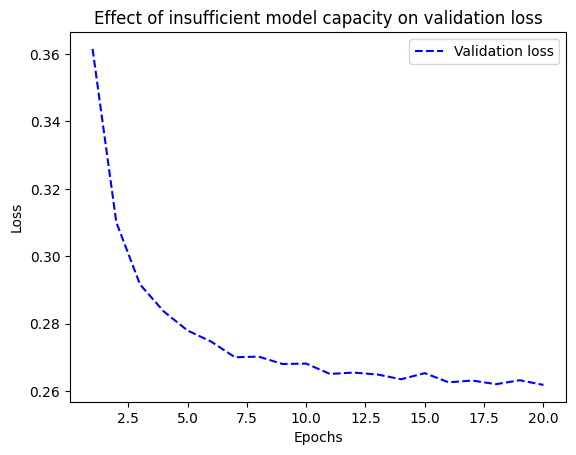

In [20]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [21]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 0.3616 - accuracy: 0.8979 - val_loss: 0.1896 - val_accuracy: 0.9463
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1587 - accuracy: 0.9523 - val_loss: 0.1340 - val_accuracy: 0.9601
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1123 - accuracy: 0.9663 - val_loss: 0.1137 - val_accuracy: 0.9666
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0859 - accuracy: 0.9738 - val_loss: 0.1038 - val_accuracy: 0.9699
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0690 - accuracy: 0.9790 - val_loss: 0.1113 - val_accuracy: 0.9688
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0573 - accuracy: 0.9820 - val_loss: 0.0958 - val_accuracy: 0.9731
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.0848 - val_accuracy: 0.9761
Epoch 

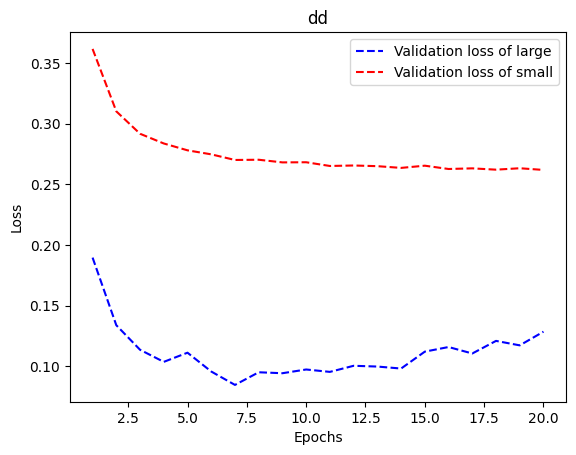

In [24]:
import matplotlib.pyplot as plt
val_loss1 = history_large_model.history["val_loss"]
val_loss2 = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss1, "b--",
         label="Validation loss of large")
plt.plot(epochs, val_loss2, "r--",
         label="Validation loss of small")
plt.title("dd")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 일반화 성능 향상하기

### 데이터셋 큐레이션

### 특성 공학

### 조기 종료 사용하기

### 모델 규제하기

#### 네트워크 크기 축소

**원본 모델**

In [34]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.5162 - accuracy: 0.7714 - val_loss: 0.3985 - val_accuracy: 0.8490
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3117 - accuracy: 0.8971 - val_loss: 0.3101 - val_accuracy: 0.8856
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2353 - accuracy: 0.9207 - val_loss: 0.2970 - val_accuracy: 0.8806
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1914 - accuracy: 0.9346 - val_loss: 0.2750 - val_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1585 - accuracy: 0.9477 - val_loss: 0.2894 - val_accuracy: 0.8844
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1368 - accuracy: 0.9557 - val_loss: 0.2856 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1174 - accuracy: 0.9626 - val_loss: 0.3045 - val_accuracy: 0.8863
Epoch 8/20
30

**작은 용량의 모델**

In [26]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.5742 - accuracy: 0.7587 - val_loss: 0.4709 - val_accuracy: 0.8511
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4031 - accuracy: 0.8827 - val_loss: 0.3783 - val_accuracy: 0.8755
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3166 - accuracy: 0.9064 - val_loss: 0.3296 - val_accuracy: 0.8802
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2621 - accuracy: 0.9205 - val_loss: 0.3086 - val_accuracy: 0.8819
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2243 - accuracy: 0.9311 - val_loss: 0.2840 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1959 - accuracy: 0.9400 - val_loss: 0.2762 - val_accuracy: 0.8903
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1740 - accuracy: 0.9459 - val_loss: 0.2759 - val_accuracy: 0.8897
Epoch 8/20
30

**큰 용량의 모델**

In [27]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 71ms/step - loss: 0.5658 - accuracy: 0.7183 - val_loss: 0.3606 - val_accuracy: 0.8540
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3098 - accuracy: 0.8725 - val_loss: 0.5812 - val_accuracy: 0.7522
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2503 - accuracy: 0.8989 - val_loss: 0.3271 - val_accuracy: 0.8658
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1927 - accuracy: 0.9244 - val_loss: 0.2859 - val_accuracy: 0.8825
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1424 - accuracy: 0.9465 - val_loss: 0.3018 - val_accuracy: 0.8796
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0984 - accuracy: 0.9653 - val_loss: 0.3779 - val_accuracy: 0.8641
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0851 - accuracy: 0.9707 - val_loss: 0.3251 - val_accuracy: 0.8847
Epoch 8/20
30

# 그림 그려볼 것!!!

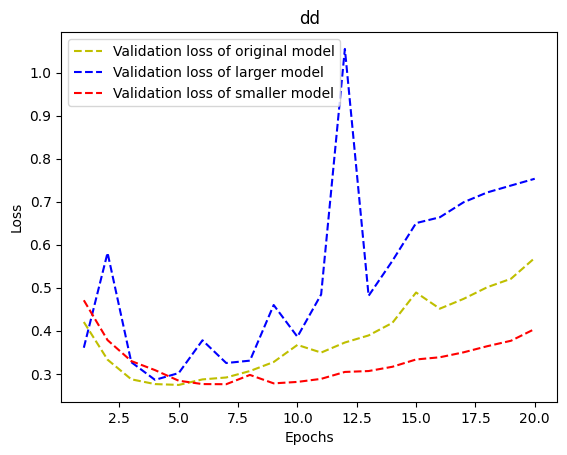

In [33]:
import matplotlib.pyplot as plt
val_loss0 = history_original.history["val_loss"]
val_loss1 = history_larger_model.history["val_loss"]
val_loss2 = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss0, "y--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss1, "b--",
         label="Validation loss of larger model")
plt.plot(epochs, val_loss2, "r--",
         label="Validation loss of smaller model")
plt.title("dd")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### 가중치 규제 추가하기

**모델에 L2 가중치 추가하기**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.6008 - accuracy: 0.7869 - val_loss: 0.5094 - val_accuracy: 0.8202
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4126 - accuracy: 0.8913 - val_loss: 0.4147 - val_accuracy: 0.8704
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3432 - accuracy: 0.9120 - val_loss: 0.3858 - val_accuracy: 0.8798
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3126 - accuracy: 0.9197 - val_loss: 0.3618 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2898 - accuracy: 0.9306 - val_loss: 0.3603 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2761 - accuracy: 0.9340 - val_loss: 0.4112 - val_accuracy: 0.8648
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2647 - accuracy: 0.9390 - val_loss: 0.3612 - val_accuracy: 0.8852
Epoch 8/20
30

**케라스에서 사용할 수 있는 가중치 규제**

In [28]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 드롭아웃 추가

**IMDB 모델에 드롭아웃 추가하기**

In [29]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.6507 - accuracy: 0.6082 - val_loss: 0.5500 - val_accuracy: 0.7852
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5385 - accuracy: 0.7458 - val_loss: 0.4516 - val_accuracy: 0.8679
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4584 - accuracy: 0.8133 - val_loss: 0.3792 - val_accuracy: 0.8769
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3935 - accuracy: 0.8527 - val_loss: 0.3350 - val_accuracy: 0.8710
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3470 - accuracy: 0.8737 - val_loss: 0.2958 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3073 - accuracy: 0.8916 - val_loss: 0.2833 - val_accuracy: 0.8911
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2682 - accuracy: 0.9055 - val_loss: 0.2818 - val_accuracy: 0.8907
Epoch 8/20
30

## 요약